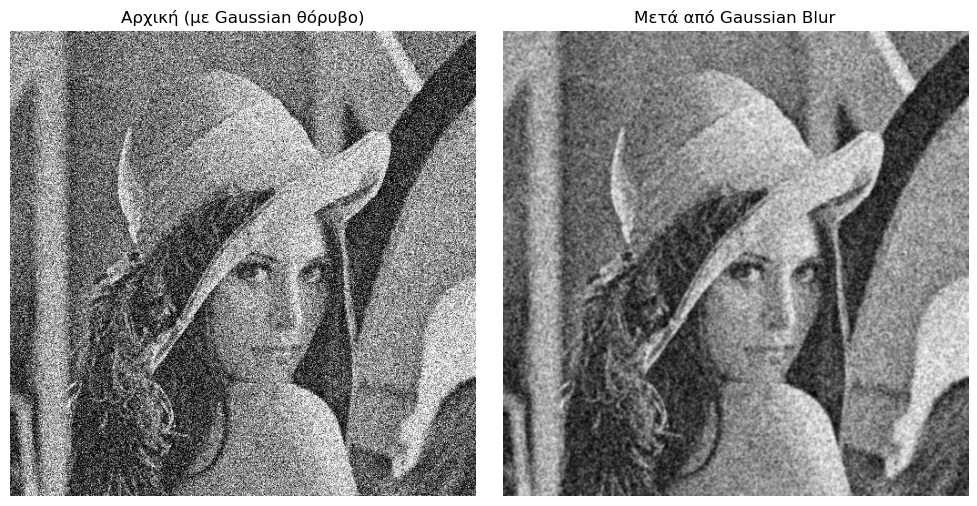

In [7]:
import cv2
import matplotlib.pyplot as plt

# 1. Φόρτωση εικόνας
img = cv2.imread('lenna-n1.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Εφαρμογή Gaussian Blur
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 1)

# 3. Εμφάνιση Αρχική vs Gaussian
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Αρχική (με Gaussian θόρυβο)")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Μετά από Gaussian Blur")
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
